In [2]:
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("players_20.csv")
df.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sofifa_id,18278,NaN,NaN,NaN,219739,27960.2,768,204446,226165,240796,252905
player_url,18278,18278,https://sofifa.com/player/242217/edo-kayembe/2...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
short_name,18278,17354,J. Rodríguez,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
long_name,18278,18218,Liam Kelly,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,18278,NaN,NaN,NaN,25.2833,4.65696,16,22,25,29,42
...,...,...,...,...,...,...,...,...,...,...,...
lb,16242,96,61+2,667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lcb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rcb,16242,110,63+2,621,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df.columns.values)

['sofifa_id' 'player_url' 'short_name' 'long_name' 'age' 'dob' 'height_cm'
 'weight_kg' 'nationality' 'club' 'overall' 'potential' 'value_eur'
 'wage_eur' 'player_positions' 'preferred_foot' 'international_reputation'
 'weak_foot' 'skill_moves' 'work_rate' 'body_type' 'real_face'
 'release_clause_eur' 'player_tags' 'team_position' 'team_jersey_number'
 'loaned_from' 'joined' 'contract_valid_until' 'nation_position'
 'nation_jersey_number' 'pace' 'shooting' 'passing' 'dribbling'
 'defending' 'physic' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_reflexes'
 'gk_speed' 'gk_positioning' 'player_traits' 'attacking_crossing'
 'attacking_finishing' 'attacking_heading_accuracy'
 'attacking_short_passing' 'attacking_volleys' 'skill_dribbling'
 'skill_curve' 'skill_fk_accuracy' 'skill_long_passing'
 'skill_ball_control' 'movement_acceleration' 'movement_sprint_speed'
 'movement_agility' 'movement_reactions' 'movement_balance'
 'power_shot_power' 'power_jumping' 'power_stamina' 'power_strength'
 'po

<AxesSubplot:>

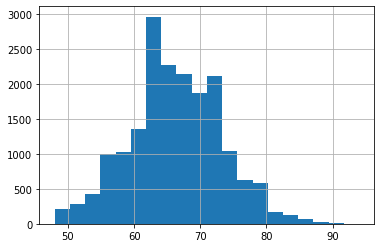

In [6]:
df.overall.hist(bins = 20)

In [7]:
skill_columns = ['pace', 'shooting', 'passing', 'dribbling',
 'defending', 'physic', 'attacking_crossing',
 'attacking_finishing', 'attacking_heading_accuracy',
 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
 'movement_agility', 'movement_reactions', 'movement_balance',
 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
 'mentality_composure', 'defending_marking', 'defending_standing_tackle',
 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling',
 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

gk_only = ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

<AxesSubplot:xlabel='team_position', ylabel='count'>

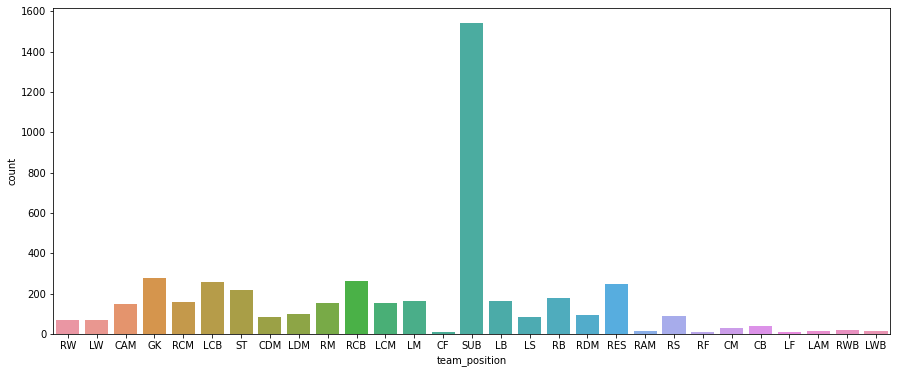

In [8]:
df_n = df[df['overall']>70]
plt.figure(figsize=(15,6))
sns.countplot(df_n.team_position)

SUB y RES corresponden a suplentes y reserva. No hacen falta y los retiramos.

<AxesSubplot:xlabel='team_position', ylabel='count'>

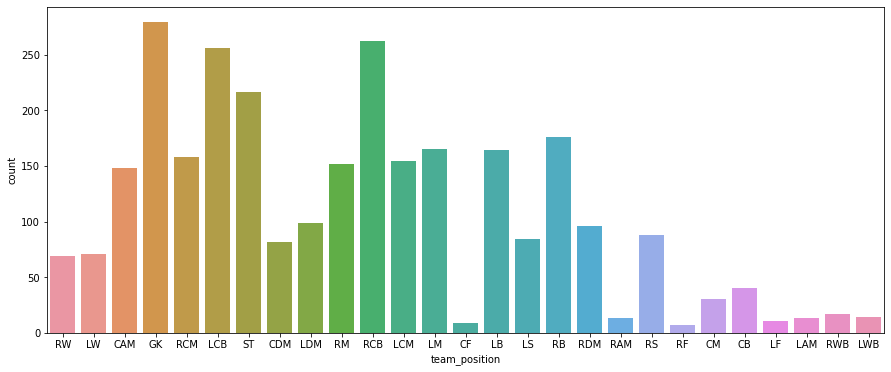

In [9]:
drop_list = ['SUB', 'RES']
df_n = df_n[~df_n['team_position'].isin(drop_list)]
plt.figure(figsize=(15,6))
sns.countplot(df_n.team_position)

In [10]:
df_skills = df_n[skill_columns+gk_only]
df_skills.fillna(0, inplace=True)

In [11]:
df_skills.shape

(2970, 46)

Hay variables de skill que parecen repetidas, vemos como se distribuyen los valores:

In [12]:
df_skills.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
pace,2970.0,62.968687,23.901082,0.0,59.00,70.0,77.0,96.0
shooting,2970.0,55.096970,22.365952,0.0,46.00,63.0,71.0,93.0
passing,2970.0,59.816162,21.462804,0.0,58.00,66.0,72.0,92.0
dribbling,2970.0,63.238384,22.668279,0.0,62.00,71.0,76.0,96.0
defending,2970.0,53.087879,24.276226,0.0,36.00,64.0,72.0,90.0
physic,2970.0,63.927946,22.474705,0.0,63.00,71.0,76.0,90.0
attacking_crossing,2970.0,58.087205,19.327585,7.0,49.00,65.0,72.0,93.0
attacking_finishing,2970.0,53.536364,20.815430,5.0,38.00,59.0,70.0,95.0
attacking_heading_accuracy,2970.0,59.448822,18.591972,7.0,52.00,64.0,73.0,93.0
attacking_short_passing,2970.0,67.692593,14.083717,11.0,66.00,71.0,76.0,92.0


<AxesSubplot:xlabel='defending', ylabel='power_stamina'>

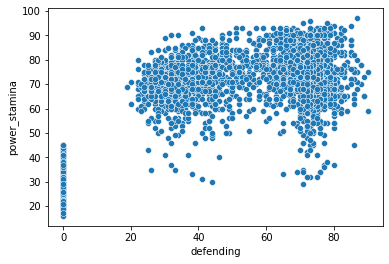

In [13]:
x = skill_columns[4]
y = skill_columns[23]
sns.scatterplot(data=df_skills, x=x, y=y)

In [14]:
from sklearn.cluster import KMeans,MeanShift, DBSCAN,  estimate_bandwidth, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.neighbors import kneighbors_graph

In [15]:
normalize = Normalizer()
scaler = StandardScaler()
minmax = MinMaxScaler()

df_scaler = scaler.fit_transform(df_skills)
df_norm = normalize.fit_transform(df_skills)
df_minmax = minmax.fit_transform(df_skills)

Text(0, 0.5, 'Inertia')

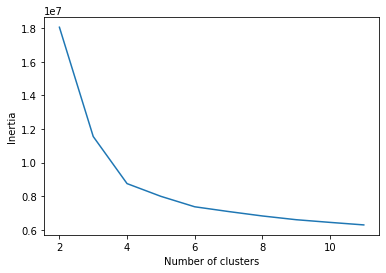

In [16]:
# Número de clusters buscado
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")

In [17]:
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  8748659.093404846


In [18]:
bandwidth = estimate_bandwidth(df_skills, quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 1


In [19]:
dbscan = DBSCAN(eps=0.001)
dbscan.fit(df_skills)
cluster3 = dbscan.labels_

labels_unique = np.unique(cluster3)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para DBSCAN : %d" % n_clusters_)

Numero estimado de clusters para DBSCAN : 1


In [20]:
n_clusters = 4

A = kneighbors_graph(df_skills, 2, mode='connectivity', include_self=True)

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', connectivity=A, affinity='cosine')
ward.fit(df_skills)
cluster4 = ward.labels_
labels_unique = np.unique(cluster4)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 4


In [20]:
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)

In [21]:
gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(df_skills)
pred = gmm.predict(df_skills)

Text(0.5, 1.0, 'Jugadores agrupados por cluster WARD')

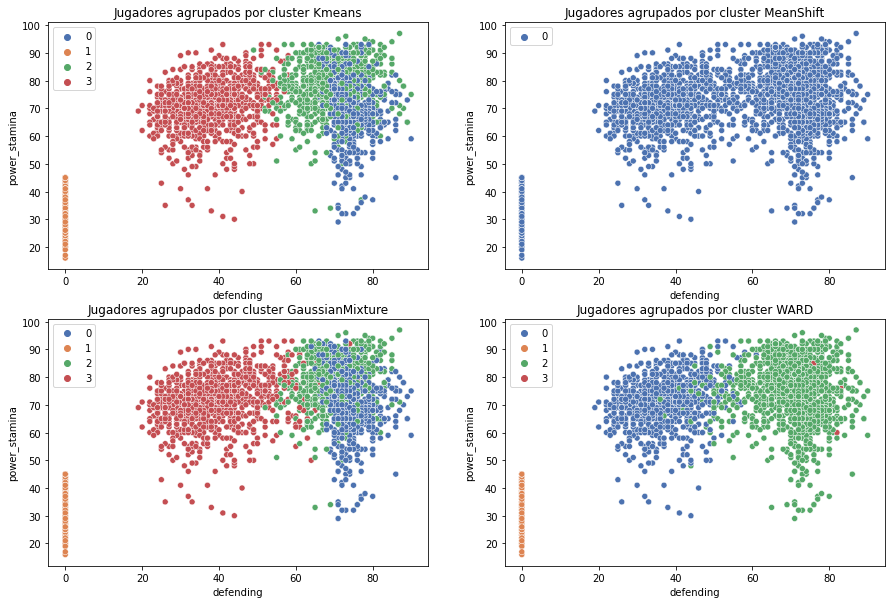

In [22]:
skill_1=skill_columns[4]
skill_2=skill_columns[23]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=clusters, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster Kmeans")
plt.subplot(2,2,2)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=clusters2, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster MeanShift")
plt.subplot(2,2,3)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=pred, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster GaussianMixture")
plt.subplot(2,2,4)
sns.scatterplot(data=df_skills, x=skill_1, y=skill_2, hue=cluster4, palette="deep")
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.title("Jugadores agrupados por cluster WARD")

Para n_clusters = 2 El valor medio de silhouette_score es : 0.7053158000130141
Para n_clusters = 3 El valor medio de silhouette_score es : 0.37001992214882806
Para n_clusters = 4 El valor medio de silhouette_score es : 0.34381589619428643
Para n_clusters = 5 El valor medio de silhouette_score es : 0.30156108060657205
Para n_clusters = 6 El valor medio de silhouette_score es : 0.24658697682943753


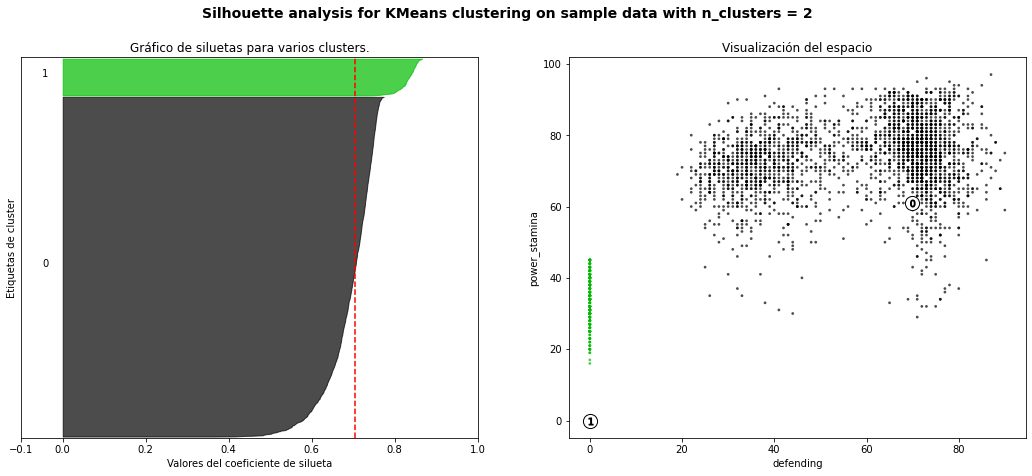

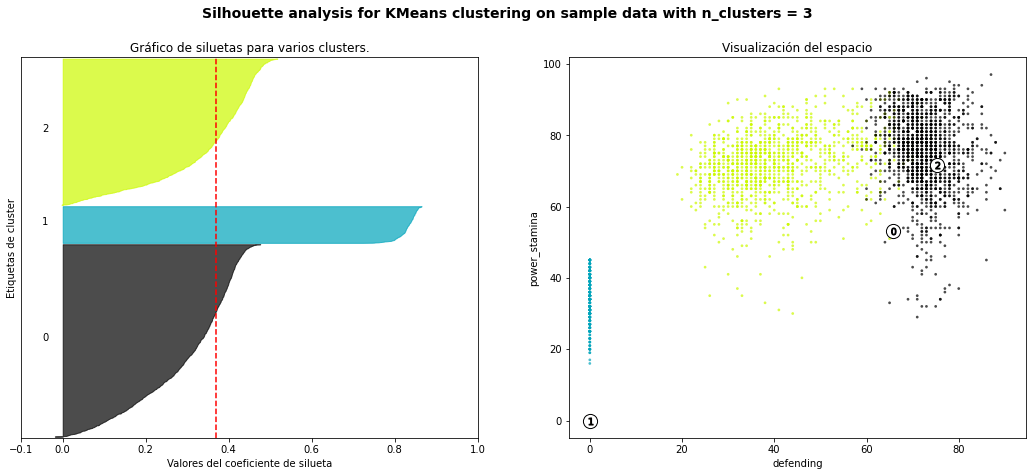

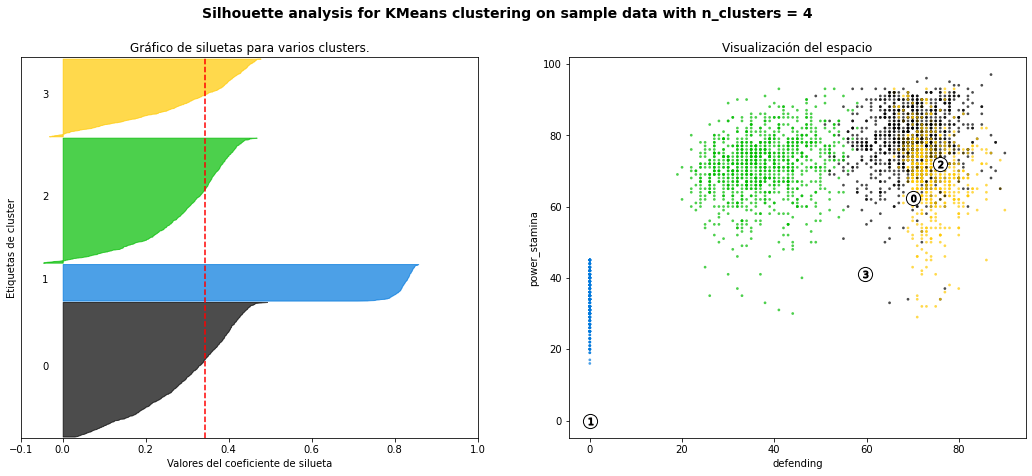

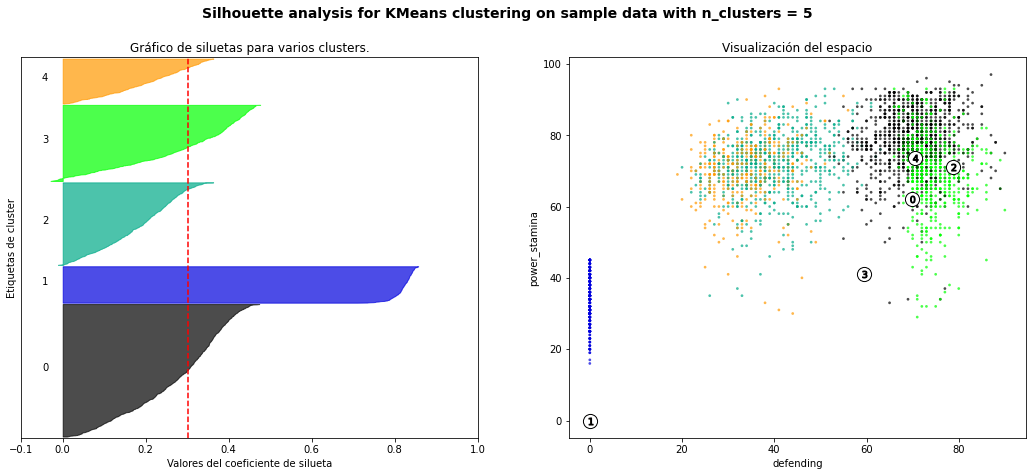

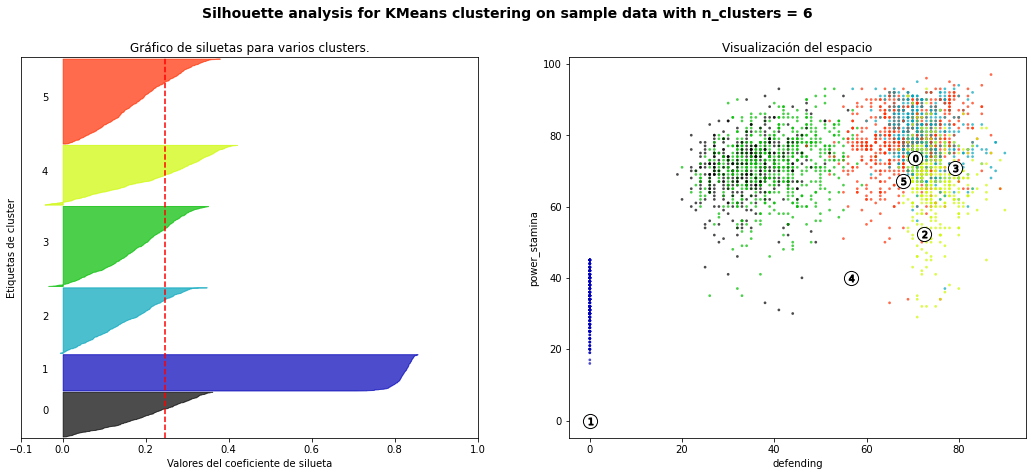

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El valor medio de silhouette_score es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de siluetas para varios clusters.")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiquetas de cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_skills.iloc[:, 4], df_skills.iloc[:, 23], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización del espacio")
    ax2.set_xlabel(skill_1)
    ax2.set_ylabel(skill_2)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [40]:
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

otras = ['height_cm', 'weight_kg', 'overall', 'potential']

forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW','CF']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

In [41]:
df0 = df_n[clusters==0]
df1 = df_n[clusters==1]
df2 = df_n[clusters==2]
df3 = df_n[clusters==3]

<AxesSubplot:xlabel='player_positions', ylabel='count'>

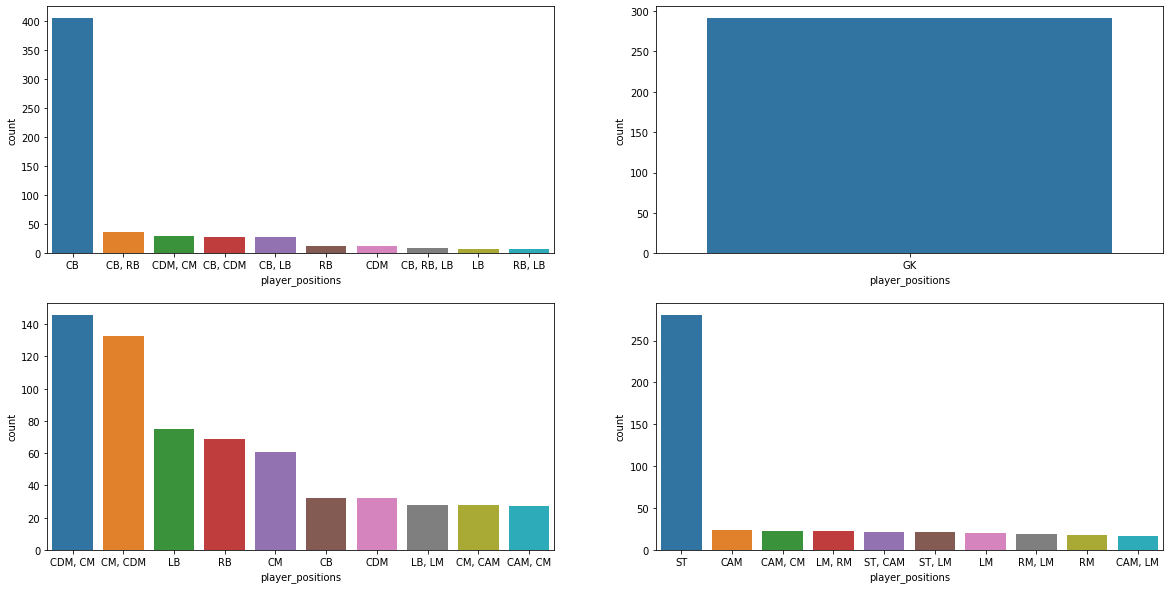

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(df0['player_positions'], order=df0['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,2)
sns.countplot(df1['player_positions'], order=df1['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,3)
sns.countplot(df2['player_positions'], order=df2['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,4)
sns.countplot(df3['player_positions'], order=df3['player_positions'].value_counts().iloc[:10].index)

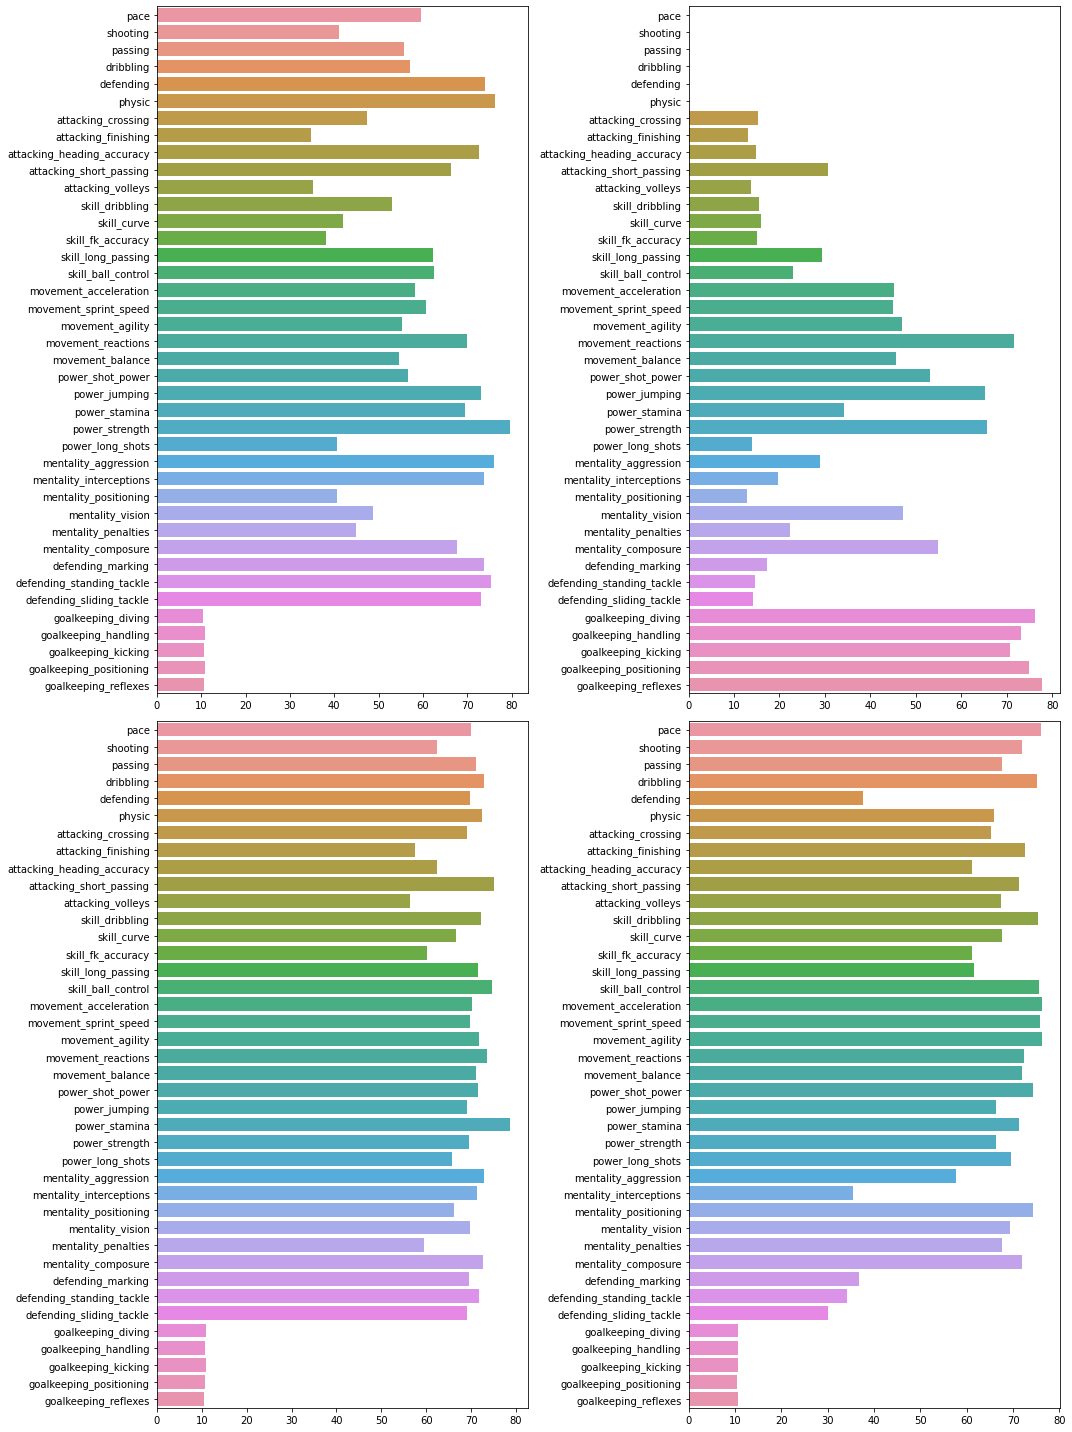

In [43]:
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
sns.barplot(x=df0[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,2)
sns.barplot(x=df1[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,3)
sns.barplot(x=df2[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,4)
sns.barplot(x=df3[skill_columns].mean(),y=skill_columns)
plt.tight_layout()

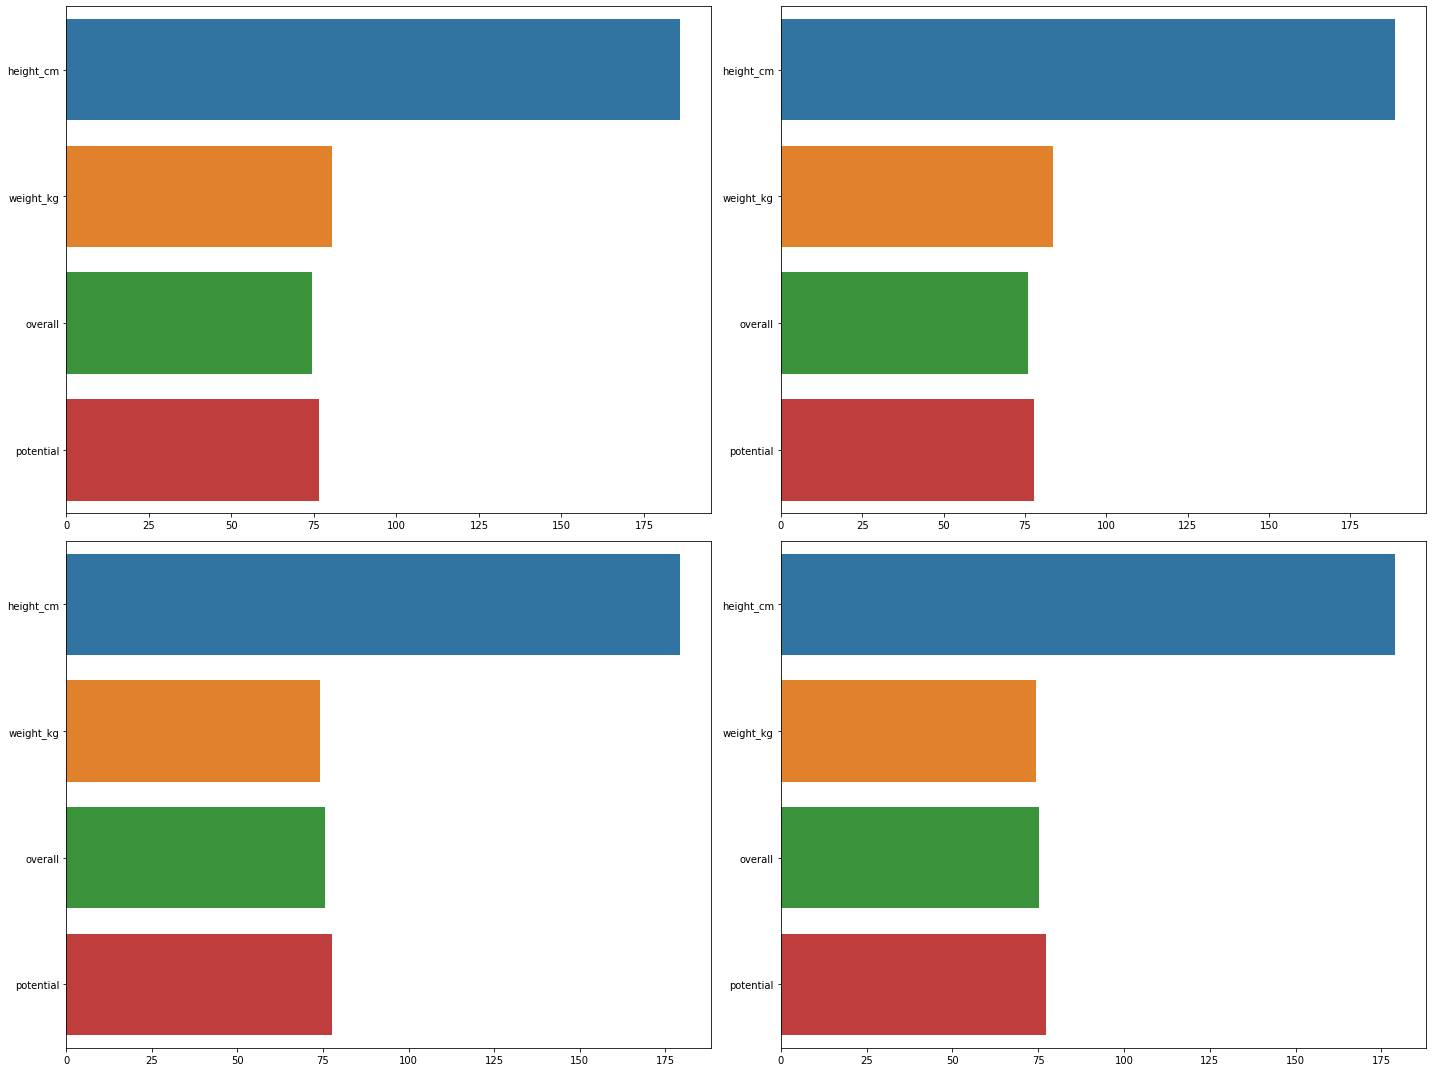

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x=df_n[clusters==0][otras].mean(),y=otras)
plt.subplot(2,2,2)
sns.barplot(x=df_n[clusters==1][otras].mean(),y=otras)
plt.subplot(2,2,3)
sns.barplot(x=df_n[clusters==2][otras].mean(),y=otras)
plt.subplot(2,2,4)
sns.barplot(x=df_n[clusters==3][otras].mean(),y=otras)
plt.tight_layout()

In [45]:
pca = decomposition.PCA(n_components=4) #elegimos 2, 3 o 4 pero pueden ser más, 

df_pca = pd.DataFrame(pca.fit_transform(df_scaler))

In [46]:
# proporción de varianza
print('proporción de varianza por componente: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

proporción de varianza por componente:  [0.60915217 0.15327138 0.04916082 0.0473593 ]
proporción de varianza por componente acumulada:  [0.60915217 0.76242355 0.81158437 0.85894367]


In [47]:
#kmeans
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_pca)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  16481.367617033666


In [48]:
#meanshift

bandwidth = estimate_bandwidth(df_pca, quantile=0.05, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_pca)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 5


In [49]:
#agglomerative

n_clusters = 4

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', affinity='cityblock')
ward.fit(df_pca)
cluster4 = ward.labels_
labels_unique = np.unique(cluster4)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 4


In [50]:
#gaussianmixture

gmm = GaussianMixture(n_components=4, covariance_type='full')
gmm.fit(df_pca)
pred = gmm.predict(df_pca)

Text(0.5, 1.0, 'Jugadores agrupados por cluster WARD')

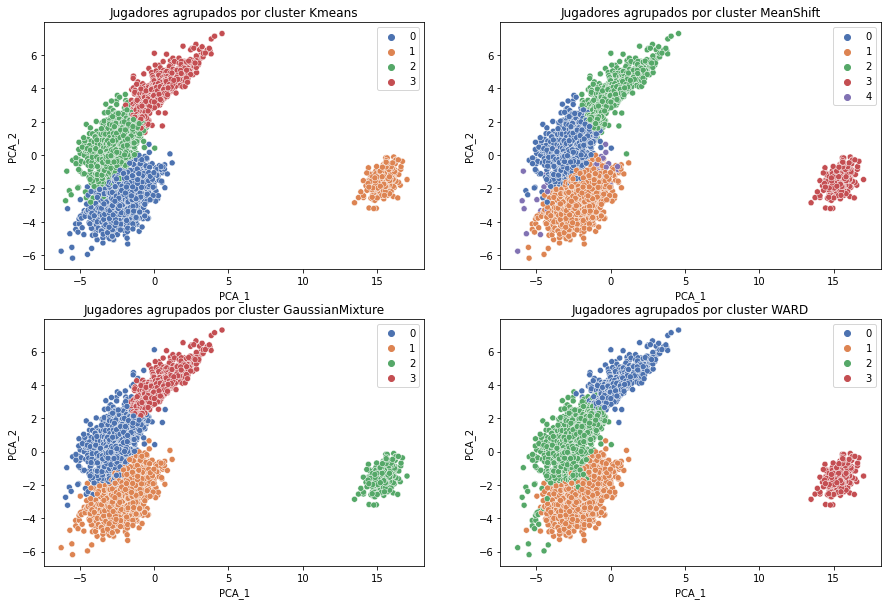

In [51]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=clusters, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster Kmeans")
plt.subplot(2,2,2)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=clusters2, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster MeanShift")
plt.subplot(2,2,3)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=pred, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster GaussianMixture")
plt.subplot(2,2,4)
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=cluster4, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster WARD")

In [52]:
from sklearn import manifold
import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca))

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2970 samples in 0.001s...
[t-SNE] Computed neighbors for 2970 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2970
[t-SNE] Computed conditional probabilities for sample 2000 / 2970
[t-SNE] Computed conditional probabilities for sample 2970 / 2970
[t-SNE] Mean sigma: 0.534076
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.230400
[t-SNE] KL divergence after 1000 iterations: 0.947339
t-SNE done! Time elapsed: 4.555430173873901 seconds


<AxesSubplot:xlabel='0', ylabel='1'>

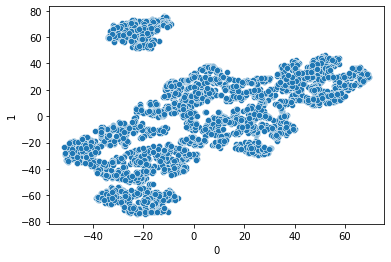

In [53]:
sns.scatterplot(df_tsne[0], df_tsne[1])

In [54]:
#kmeans
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_tsne)

# Recuperacion de etiquetas
clusters = km.labels_

In [55]:
#meanshift

bandwidth = estimate_bandwidth(df_tsne, quantile=0.12, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(df_tsne)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para MeanShift : %d" % n_clusters_)

Numero estimado de clusters para MeanShift : 5


In [56]:
#agglomerative

n_clusters = 5

A = kneighbors_graph(df_tsne, 2, mode='connectivity', include_self=True)

ward = AgglomerativeClustering( linkage='average', connectivity=A, affinity='cosine')
ward.fit(df_tsne)
cluster4 = ward.labels_
labels_unique = np.unique(cluster4)
n_clusters_ = len(labels_unique)
print("Numero estimado de clusters para average : %d" % n_clusters_)

Numero estimado de clusters para average : 2


In [57]:
#gaussianmixture

gmm = GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(df_tsne)
pred = gmm.predict(df_tsne)

Text(0.5, 1.0, 'Jugadores agrupados por cluster AVERAGE')

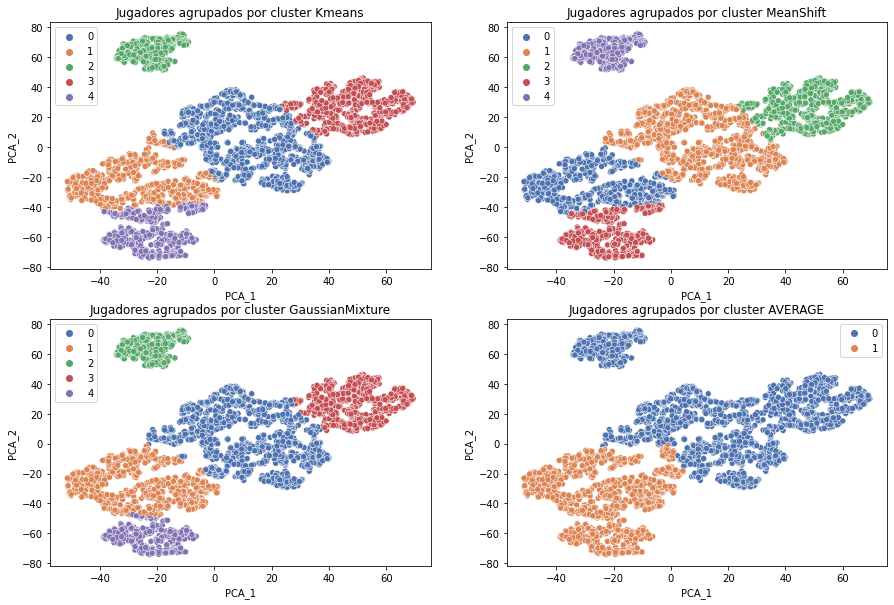

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=clusters, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster Kmeans")
plt.subplot(2,2,2)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=clusters2, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster MeanShift")
plt.subplot(2,2,3)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=pred, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster GaussianMixture")
plt.subplot(2,2,4)
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], hue=cluster4, palette="deep")
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title("Jugadores agrupados por cluster AVERAGE")

Para n_clusters = 2 El valor medio de silhouette_score es : 0.45797896
Para n_clusters = 3 El valor medio de silhouette_score es : 0.4702733
Para n_clusters = 4 El valor medio de silhouette_score es : 0.4906765
Para n_clusters = 5 El valor medio de silhouette_score es : 0.45102283
Para n_clusters = 6 El valor medio de silhouette_score es : 0.4901536


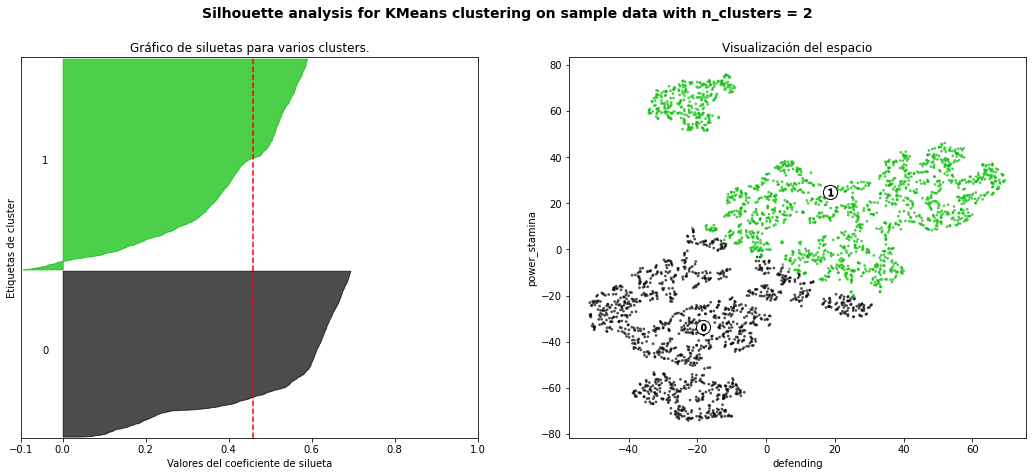

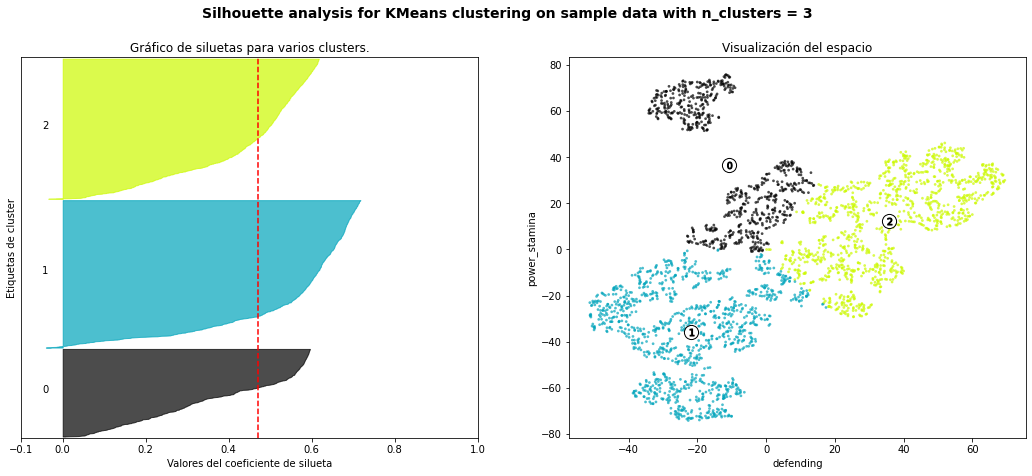

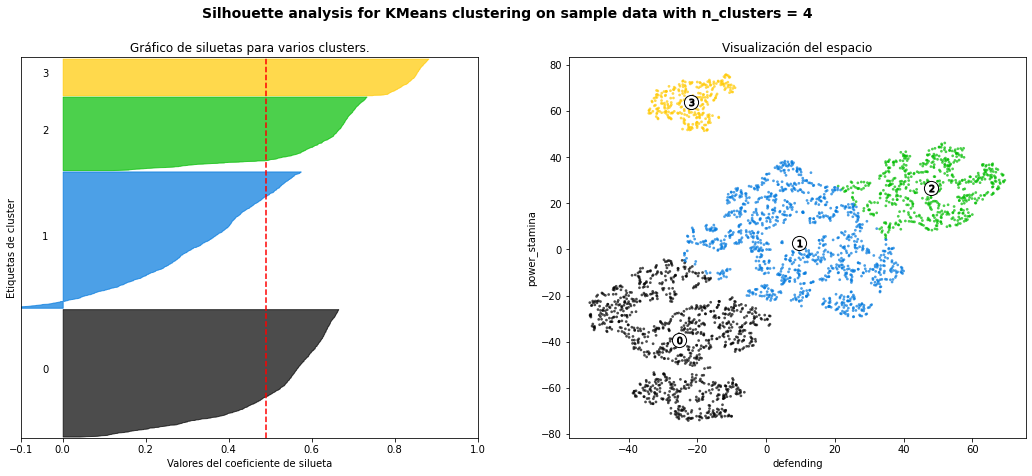

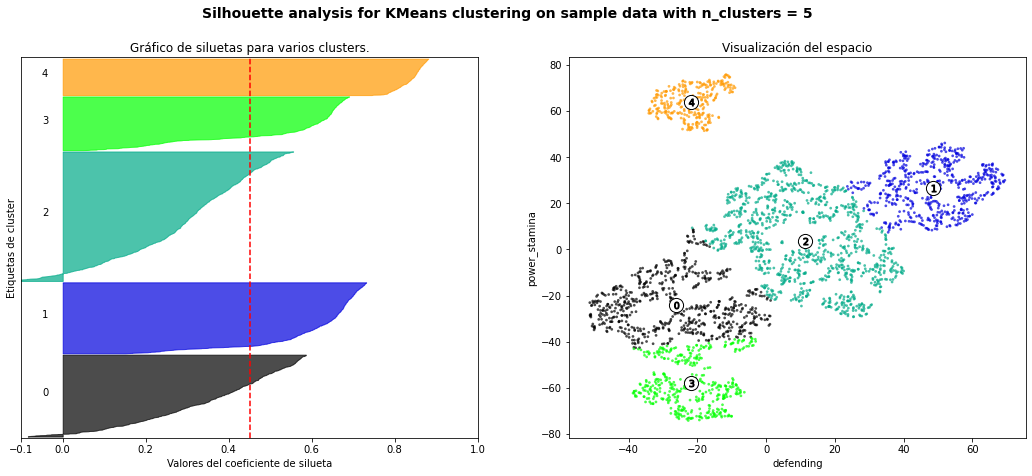

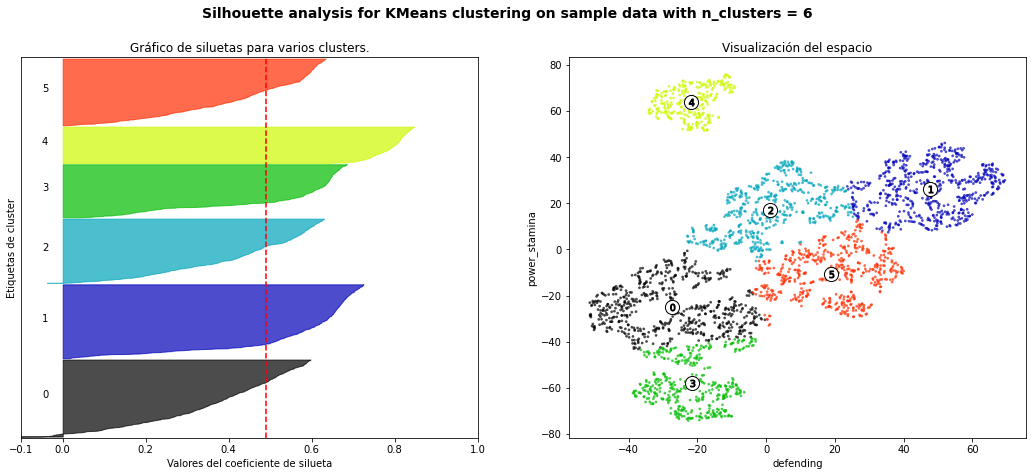

In [63]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_tsne, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El valor medio de silhouette_score es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de siluetas para varios clusters.")
    ax1.set_xlabel("Valores del coeficiente de silueta")
    ax1.set_ylabel("Etiquetas de cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_tsne.iloc[:, 0], df_tsne.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualización del espacio")
    ax2.set_xlabel(skill_1)
    ax2.set_ylabel(skill_2)

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [60]:
df0 = df_n[pred==0]
df1 = df_n[pred==1]
df2 = df_n[pred==2]
df3 = df_n[pred==3]
df4 = df_n[pred==4]

<AxesSubplot:xlabel='player_positions', ylabel='count'>

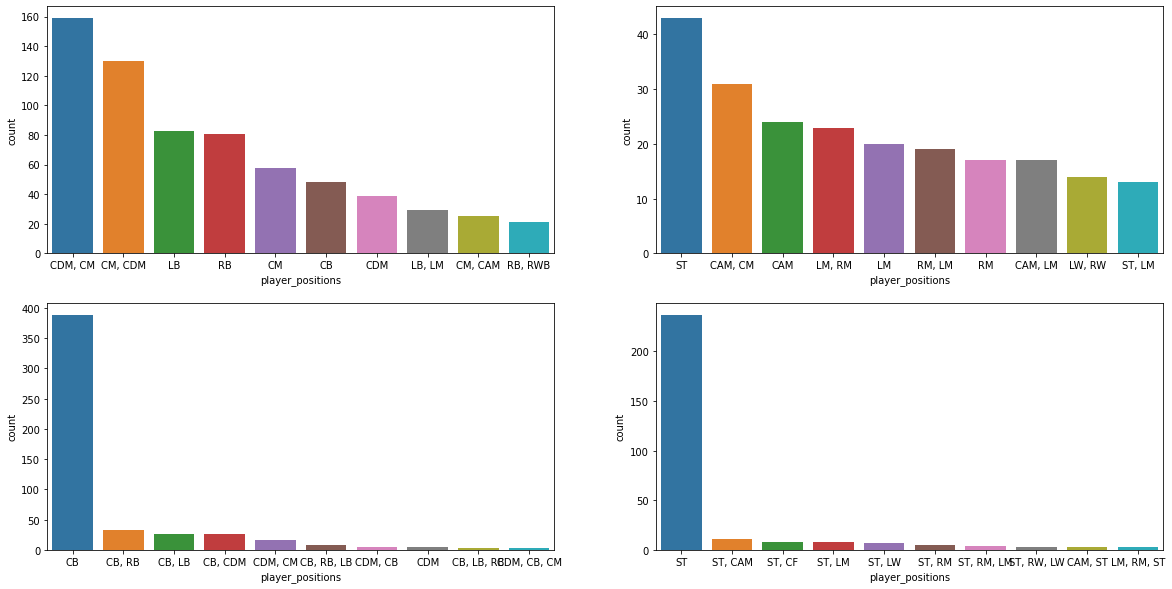

In [64]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(df0['player_positions'], order=df0['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,2)
sns.countplot(df1['player_positions'], order=df1['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,3)
sns.countplot(df3['player_positions'], order=df3['player_positions'].value_counts().iloc[:10].index)
plt.subplot(2,2,4)
sns.countplot(df4['player_positions'], order=df4['player_positions'].value_counts().iloc[:10].index)

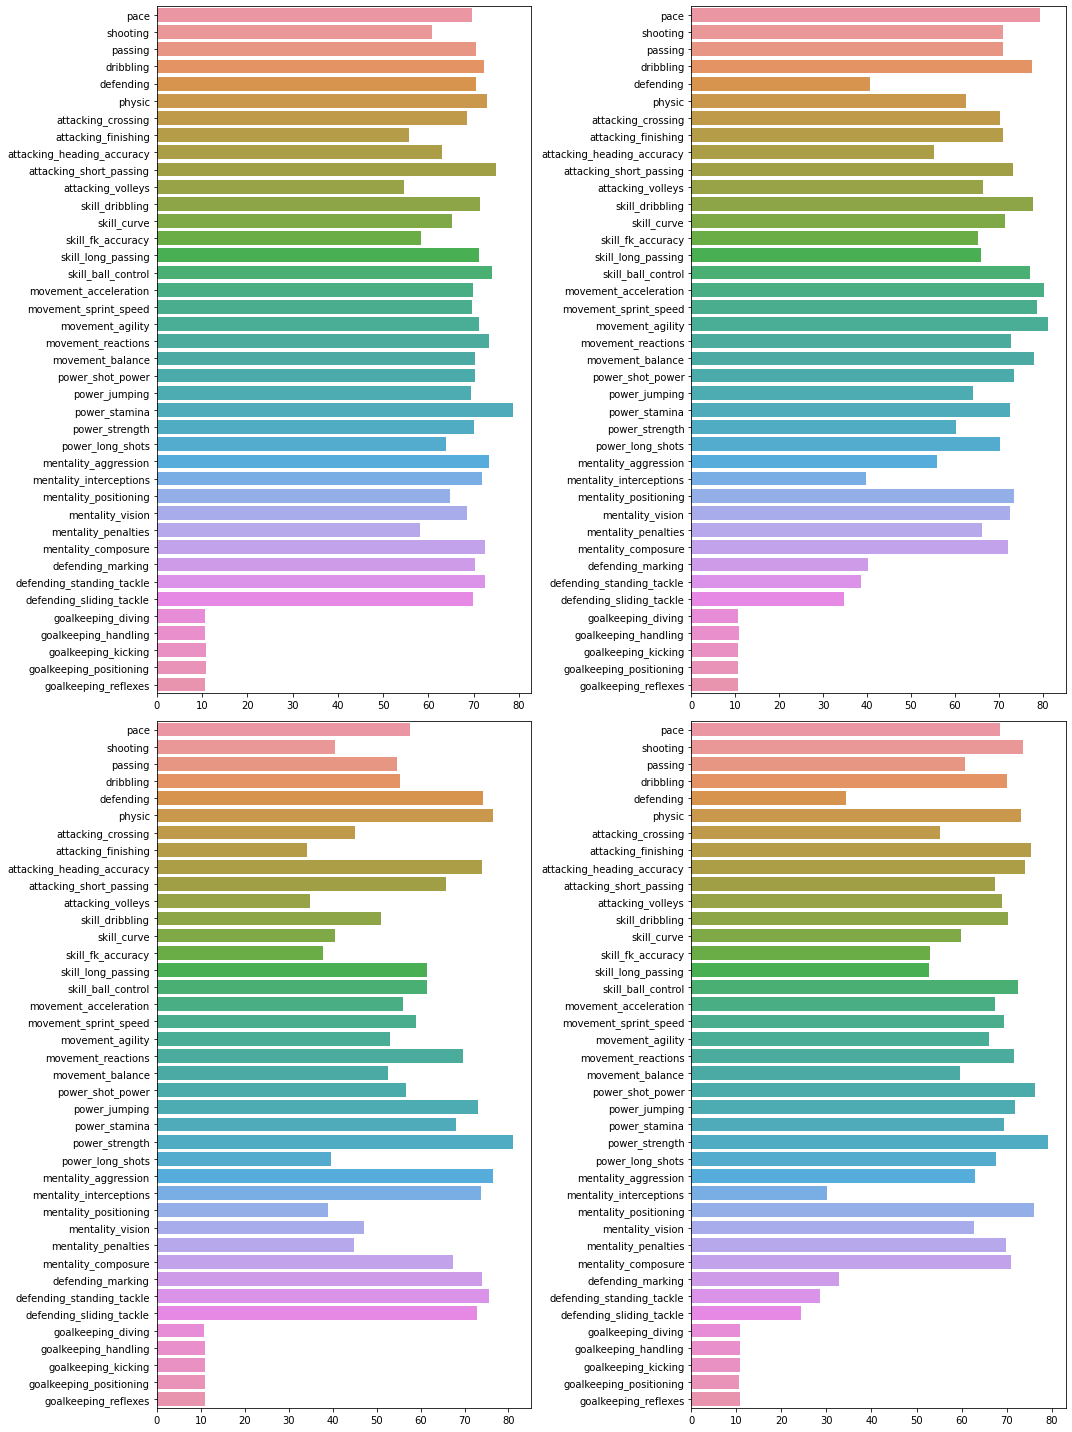

In [65]:
plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
sns.barplot(x=df0[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,2)
sns.barplot(x=df1[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,3)
sns.barplot(x=df3[skill_columns].mean(),y=skill_columns)
plt.subplot(2,2,4)
sns.barplot(x=df4[skill_columns].mean(),y=skill_columns)
plt.tight_layout()